# Customer Lifetime Value

Customer Lietime value is a prediction of how much revenue a customer can make for a business during the course of his entire life. Say for example, if I am a regular customer at McDonalds, I may be providing them with around 2000 rupees per month. So if this trend continues, and say hypothetically I do this for 10 months, then by a prediction, over the course of 2 years, I'll be making them 48000 rupees. Obviously the values and scenario I used is an ideal one, ideal in the sense that obviously I won't be providing them with 2000 rupees every month, it might be more or less than that. 

Now why would McDonalds need this value of 48000 rupees of mine ?

Well there is no guarantee that I will be eating at one of their outlets even after the tenth month. I might go to burger king, or maybe burger singh if I had an accident and hit my head really hard, because they might be offering a better value burger for my bucks. So overall when I could be contributing as towards higher revenues, mcdonalds might loose me because well they didn't give me attention (Yeah it's not just limited to relationships anymore !)!

So what can they do ? Well give me offers, focus on me, provide me with their attention, give me coupons as a token of appreciation to play with my emotions to get that maximum revenue generated.

Obviously, if I have less Customer Lifetime Value, investing time and money on me may not lead to the most profitab le scenario for a business. 

So hopefully you get an idea as to why CLV is important !

You can find the data from kaggle here : https://www.kaggle.com/pankajjsh06/ibm-watson-marketing-customer-value-data/downloads/ibm-watson-marketing-customer-value-data.zip/1

In [1]:
import pandas as pd
import numpy as np

In [2]:
lifetime = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [3]:
lifetime.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
lifetime.shape

(9134, 24)

In [5]:
lifetime.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
lifetime = lifetime[['Customer', 'State', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Customer Lifetime Value']]

Let's find out how many columns are actually related to our Customer Lifetime Value column 

In [7]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

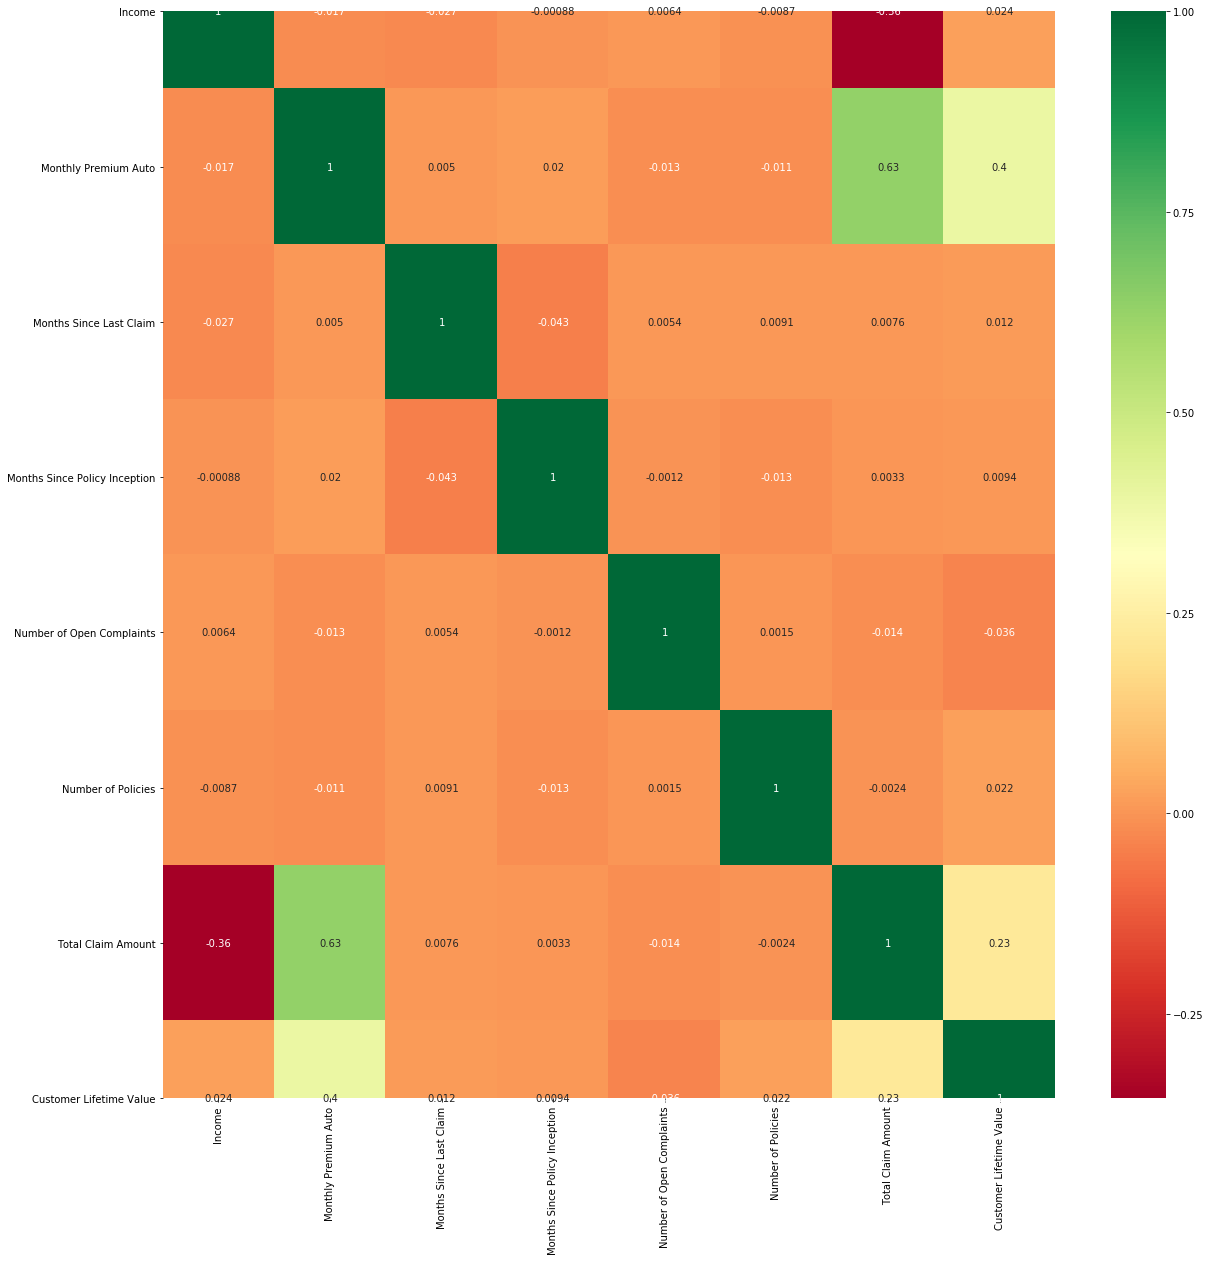

In [8]:
sns.heatmap(lifetime.corr(), annot =True, cmap='RdYlGn')
f = plt.gcf()
f.set_size_inches(20,20) #If only it was that easy to set size in inches in real life, not saying I have a problem

There is a high correlation between monthly premium auto, total auto claim with Customer Lifetime Value

Remember these are only the numerical columns we have found the correlation with. Let's dig into remaining columns

'Customer', 'State', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
        'Location Code', 'Marital Status', 'Monthly Premium Auto', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Customer Lifetime Value'

The above are the columns that remain when removing less/uncorrelated numerical columns from the dataset

Now by intuition, there are certain columns, which to me appear ridiculous to be used and I'll be removing them straight away (Effective To Date, Location Code, Sales Channel)

In [9]:
lifetime2 = lifetime[['Customer', 'State', 'Response', 'Coverage',
       'Education', 'EmploymentStatus', 'Gender', 'Marital Status', 'Monthly Premium Auto', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Customer Lifetime Value']]

Now let's analyse how much informative these columns are going to be

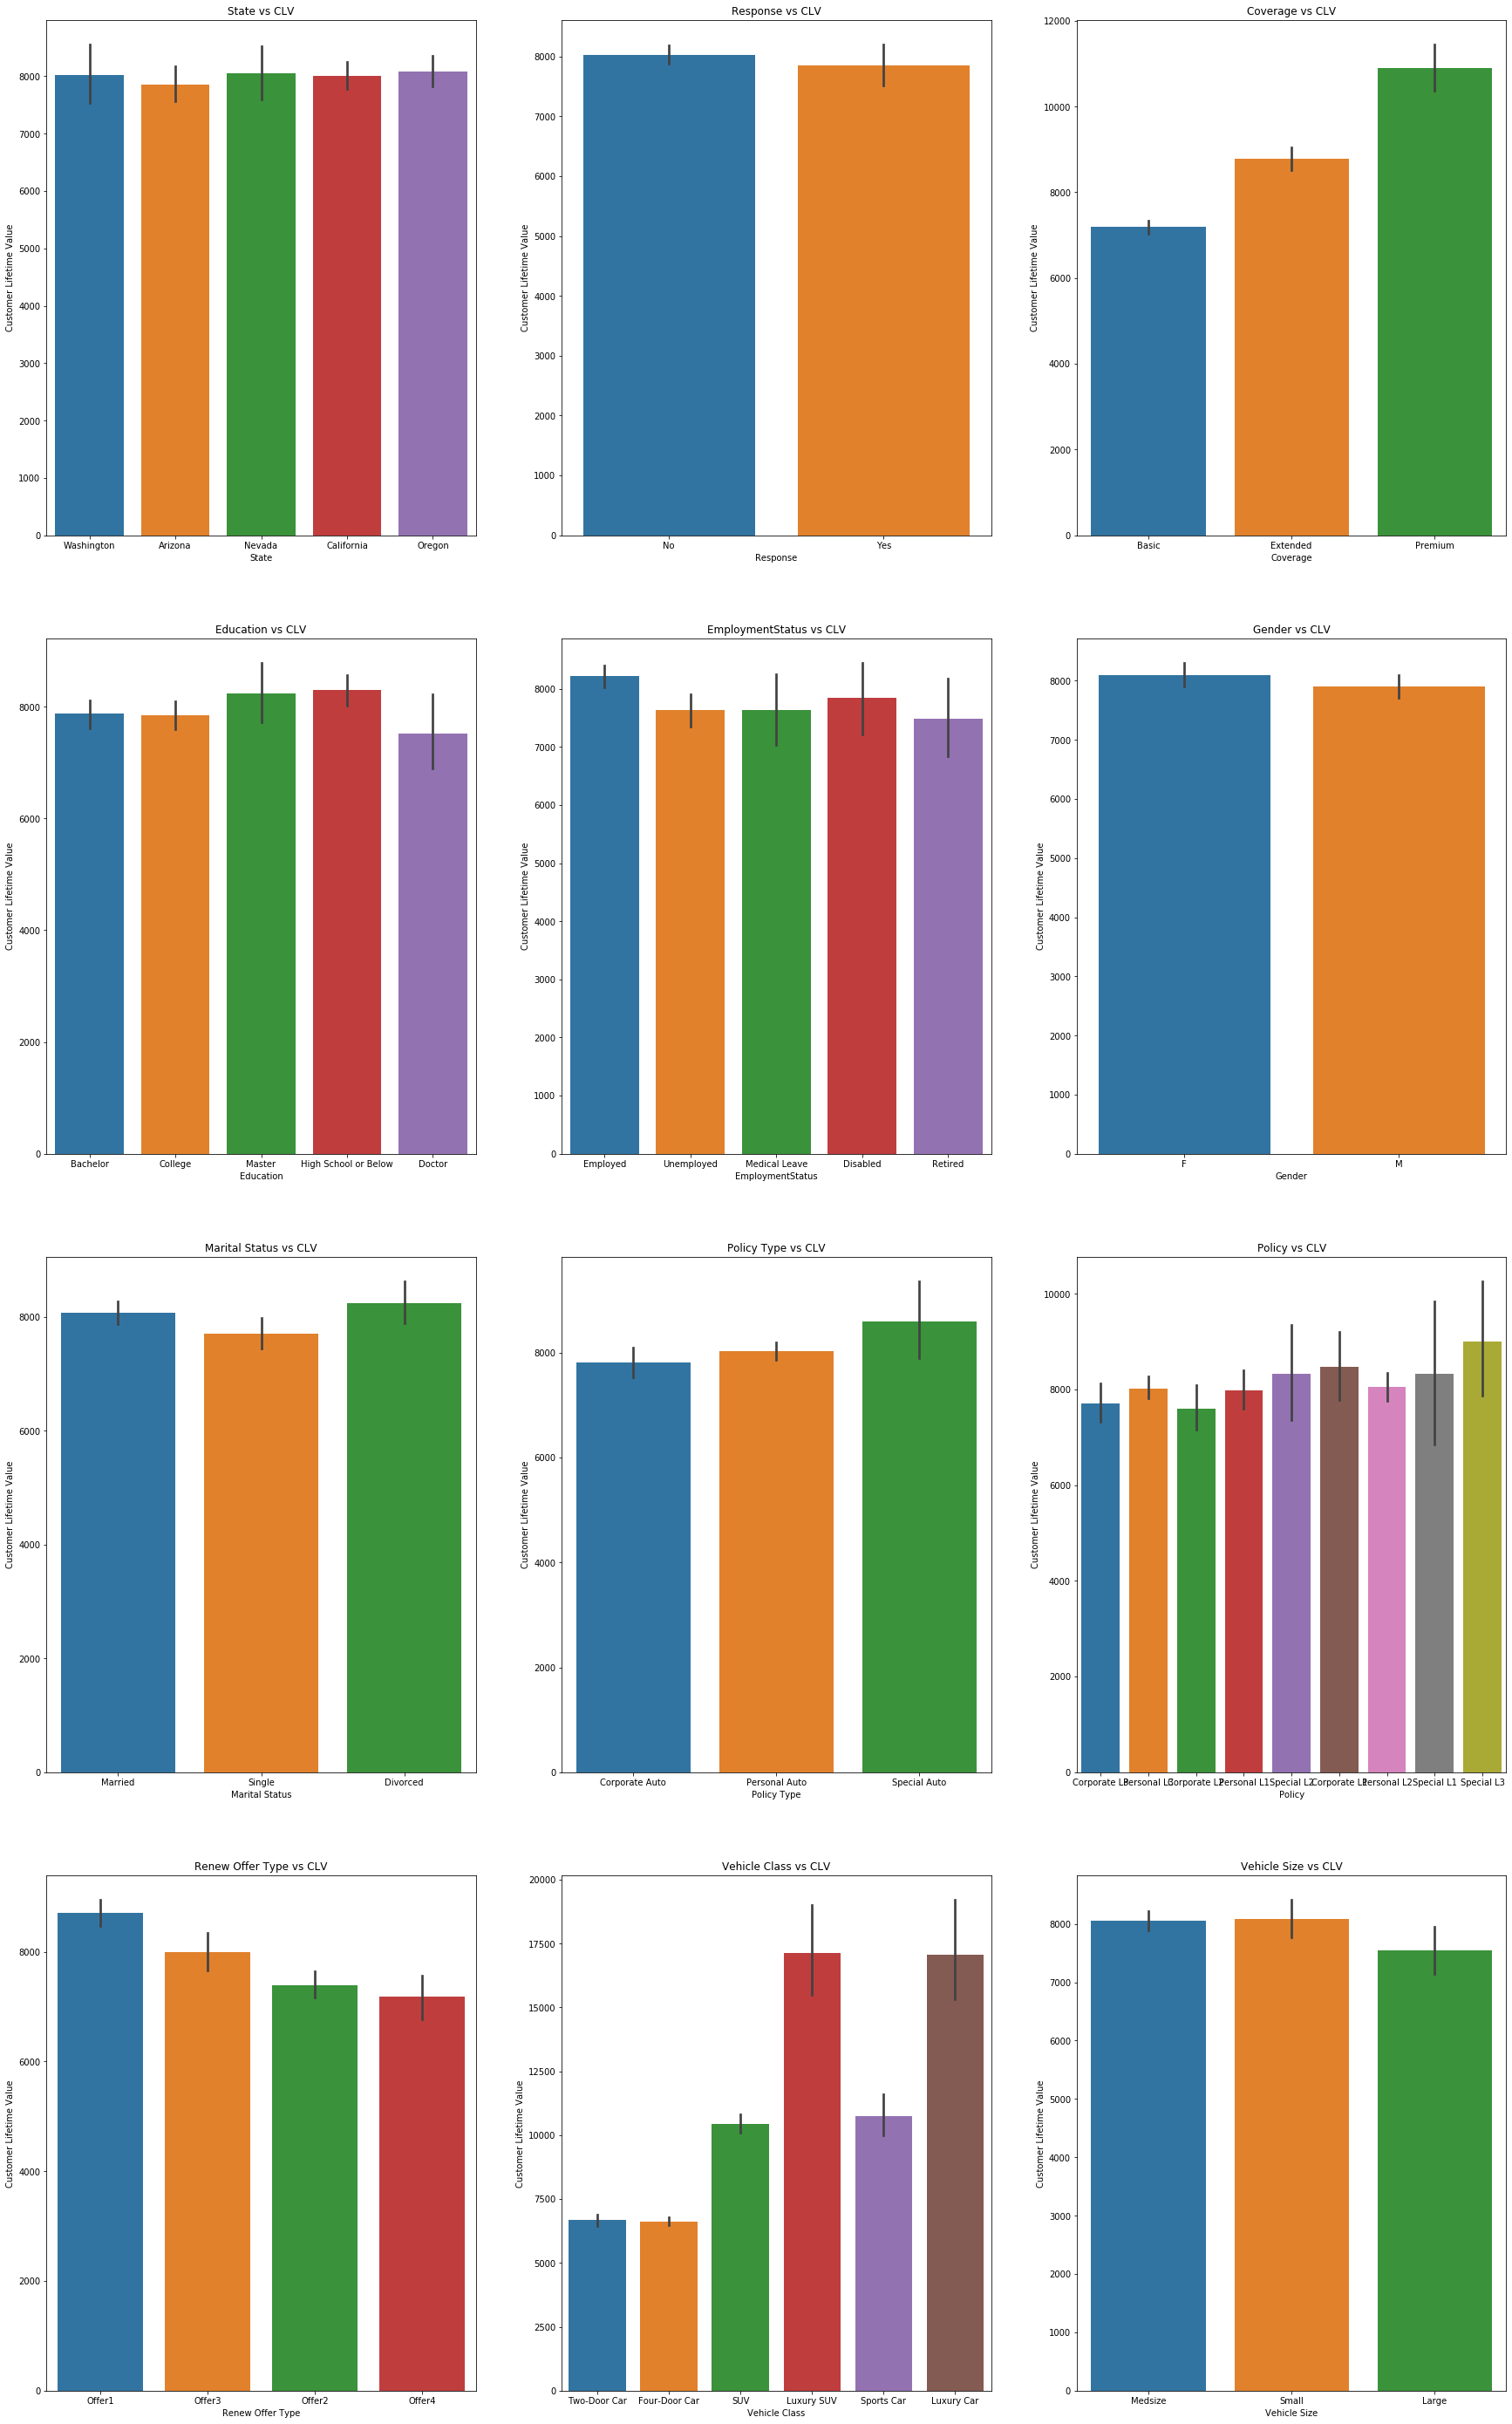

In [10]:
f,ax = plt.subplots(4,3,figsize=(30,50))
i=0
j=0
for col in lifetime2.columns:
    if j==3:
        i=i+1
        j=0
    if col not in ['Customer Lifetime Value','Total Claim Amount','Monthly Premium Auto','Customer'] :
        sns.barplot(col,'Customer Lifetime Value',data=lifetime2,ax=ax[i,j])
        ax[i,j].set_title(col+' vs CLV')
        j=j+1
       

So from the barplots above, Vehicle class and coverage as clv are the only categorical columns that provide enough information to be used for our predictive model.

Let's convert these to integers for building our model

In [11]:
lifetime.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Customer Lifetime Value'],
      dtype='object')

I have made a model based on just the features which are in someway correlated to our output variable. But it is performing really bad (0.16 waas the R squared score).

So currently, I am going to brainstorm the features to select which ones appear useful and then work upon them to build the model, since features which are coming out to be useful are not really helping us in predictive analysis. Now it may be that the data more specifically the features we have are not well distinguished and informative enough to actually be used for predictions, in that case, there isn't much I'll be able to do !

Though not very distinguishable, I can use the state column in my predictive model

Based on the EDA i have performed above, these are the columns I'll be using in my predictive model :

'State', 'Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Income', 'Marital Status', 'Monthly Premium Auto','Months Since Last Claim','Number of Open Complaints', 'Number of Policies', 'Policy Type','Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount','Vehicle Class', 'Vehicle Size', 'Customer Lifetime Value'

Some of these columns are categorical so I'll have to convert them to numerical

In [12]:
lifetime3 = lifetime[['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Income', 'Marital Status', 'Monthly Premium Auto','Months Since Last Claim','Number of Open Complaints', 'Number of Policies', 'Policy Type','Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount','Vehicle Class', 'Vehicle Size', 'Customer Lifetime Value']]

In [13]:
lifetime3.dtypes

State                         object
Response                      object
Coverage                      object
Education                     object
EmploymentStatus              object
Gender                        object
Income                         int64
Marital Status                object
Monthly Premium Auto           int64
Months Since Last Claim        int64
Number of Open Complaints      int64
Number of Policies             int64
Policy Type                   object
Policy                        object
Renew Offer Type              object
Sales Channel                 object
Total Claim Amount           float64
Vehicle Class                 object
Vehicle Size                  object
Customer Lifetime Value      float64
dtype: object

In [14]:
categorical = []
for i in lifetime3.dtypes.index:
    if (lifetime3[i].dtype==np.dtype('O')):
        categorical.append(i)

In [15]:
categorical

['State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

In [16]:
for i in categorical:
    values = lifetime3[i].value_counts().index
    j = len(lifetime3[i].value_counts())
    lifetime3[i].replace(values,range(1,j+1),inplace=True)

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6788: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [17]:
lifetime3.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Income,Marital Status,Monthly Premium Auto,Months Since Last Claim,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Customer Lifetime Value
0,5,1,1,1,1,1,56274,1,69,32,0,1,2,4,1,1,384.811147,2,1,2763.519279
1,3,1,2,1,2,1,0,2,94,13,0,8,1,1,3,1,1131.464935,1,1,6979.535903
2,4,1,3,1,1,1,48767,1,108,18,0,2,1,1,1,1,566.472247,2,1,12887.431650
3,1,1,1,1,2,2,0,1,106,18,0,7,2,5,1,3,529.881344,3,1,7645.861827
4,5,1,1,1,1,2,43836,2,73,12,0,1,1,3,1,1,138.130879,1,1,2813.692575


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(lifetime3.iloc[:,:-1],lifetime3.iloc[:,-1:])

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()

In [22]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
model.score(x_test,y_test)

0.16043465299228232

Let's try exhaustive feature selection !

In this subset of features is chosen from all possible subsets such that the model performs the best. 

You will however need the package mlxtend (pip install mlxtend) to perform this.

In [24]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as efs

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
emodel=efs(RandomForestRegressor(),min_features=1,max_features=5,scoring='r2',n_jobs=-1)

In [27]:
emodel.fit(x_train,y_train)

Features: 16663/16663

ExhaustiveFeatureSelector(clone_estimator=True, cv=5,
                          estimator=RandomForestRegressor(bootstrap=True,
                                                          criterion='mse',
                                                          max_depth=None,
                                                          max_features='auto',
                                                          max_leaf_nodes=None,
                                                          min_impurity_decrease=0.0,
                                                          min_impurity_split=None,
                                                          min_samples_leaf=1,
                                                          min_samples_split=2,
                                                          min_weight_fraction_leaf=0.0,
                                                          n_estimators='warn',
                                                          n_jobs=None,
  

The above method is computationally very expensive !

In [29]:
emodel.best_idx_

(4, 8, 9, 11, 16)

In [30]:
lifetime3.columns[list(emodel.best_idx_)]

Index(['EmploymentStatus', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Number of Policies', 'Total Claim Amount'],
      dtype='object')

In [31]:
li = lifetime3.columns[list(emodel.best_idx_)]
lifetime4 = lifetime3[li]

In [32]:
x_train,x_test,y_train,y_test = train_test_split(lifetime4.iloc[:,:-1],lifetime4.iloc[:,-1:])
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.4366482949166668

That's cosiderably a better score !

Alternatively, I could've used forward or backward feature selection to get top features, say top 10, and then performed exhaustive feature selection on the selected features to reduce them to 5 or 6. Obviously, having more or less features would've changed my model(made it better or worse).

Do remember that the above feature exhaustive selection task is very computationally expensive, it took my system 1.5 hours to get those top 5 features, also since I used all the features instead of just say 10 to perform exhaustive feature selection on, the combinations were a lot. So you can tinker that as well.

#### As for the customer lifetime value, finding out customers lifetime value gives access to segregating customers and extracting maximum profit from the customers having high lifetime value by giving them offers, discounts, goodie bags etc. 